# DECISION TREE

__Cây quyết định (Decision Tree)__: là một model hấp dẫn nếu chúng ta quan tâm đến khả năng diễn giải. Giống như tên của nó "Cây quyết định". Chúng ta có thể khai phá dữ liệu của chúng ta thông qua một loạt câu hỏi.<br />
Hãy xem xét ví dụ sau, trong đó chúng tôi sử dụng cây quyết định để quyết định một hoạt động cụ thể trong ngày:
![alt text](https://machinelearningcoban.com/assets/34_id3/dt_res.png)

Dựa vào các feature của tập dữ liệu huấn luyện, cây quyết định đưa ra một loạt các câu hỏi để trả lời nhãn của dữ liệu như ví dụ trên. Mặc dù ví dụ minh họa dựa trên các biến rời rạc nhưng trong thực tế thì dữ liệu liên tục vẫn có thể được chấp nhận, giống như tập dữ liệu Iris. <br />
Ví dụ, chúng ta có thể cắt đoạn dữ liệu về sepal width (chiều rộng đài hoa) để trả lời cho câu hỏi nhị phân như: Chiều rộng đài hoa >= 2.8 cm?

Dùng thuật toán cây quyết định, chúng ta bắt đầu từ gốc (root) và phân tách dữ liệu dựa trên mỗi feature có kết quả lớn nhất của __Information Gain(IG)__. Quá trình này lặp đi lặp lại cho đến khi các node con là các node lá thuần khiết. Trong thực tế, điều này có thể dẫn đến một cây rất sâu với nhiều nút, dễ dẫn đến tình trạng thừa. Vì vậy chúng ta thường muốn cắt tỉa cây bằng cách đặt giới hạn độ sâu cho cây.

# Tối đa hóa Information Gain

Để phân tách các node với nhiều thông tin nhất. Chúng ta cần định nghĩa một hàm mục tiêu mà chúng ta muốn tối ưu hóa thông qua thuật toán học cây. Ở đây, hàm mục tiêu của chúng ta dùng để tối đa hóa Information Gain mỗi lần tách.<br />
Hàm mục tiêu có thể được định nghĩa như sau:
$$IG(D_p , f) = I(D_p) - \sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)$$

Trong đó:<br />
$f$: là feature để thực hiện phân chia.<br />
$D_p$ và $D_j$: là tập dữ liệu của cha và node con thứ j.<br />
$I$: là thước đo độ tạp chất (__impurity__).<br />
$N_p$: là tổng số lượng mẫu training ở node cha.<br />
$N_j$: là tổng số lượng mẫu training ở node con thứ j.

__Information Gain__ đơn giản là độ sai khác giữa độ tạp chất của node cha so với tổng độ tạp chất của các node con. Giảm độ tạp chất của các node con thì Information Gain sẽ càng lớn. Tuy nhiên để đơn giản và để giảm không gian tìm kiếm nên hầu hết các thư viện (bao gồm cả scikit-learn) đều thực hiện bằng cây quyết định nhị phân. Có nghĩa là mỗi node cha được chia thành 2 node con.
$$IG(D_p , f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

__Ba cách để đo độ tạp chất thường dùng trong cây nhị phân là:__ Gini impurity ($I_G$), entropy ($I_H$) và classification error ($I_E$). Chúng ta bắt đầu với định nghĩa của entropy cho tất cả non-empty class (p(i|t) $\neq$ 0).<br />
Công thức entropy được định nghĩa như sau:
$$I_H(t) = -\sum_{i=1}^{c}p(i|t)log_2p(i|t)$$
Trong đó:<br />
__p(i|t)__: là xác xuất mẫu thuộc về class thứ $i$ của node $t$. Entropy sẽ là 0 nếu tất cả các mẫu thuộc cùng 1 class.

Gini impurity có thể được hiểu như là tiêu chuẩn để giảm xác xuất phân loại sai.<br />
Công thức gini impurity được định nghĩa như sau:
$$I_G(t) = \sum_{i=1}^{c}p(i|t)(1 - p(i|t)) = 1 - \sum_{i=1}^{c}p(i|t)^2$$

Tuy nhiên, trong thực tế cả gini impurity và entropy đều mang lại kết quả rất giống nhau. Và không đáng để giành nhiều thời gian để đánh giá cây thay vì thử nghiệm các cách cắt tỉa khác nhau.<br />
Một biện pháp đo độ tạp chất khác là classification error:<br />
$$I_E(t) = 1 - max\{p(i|t)\}$$

Đây là một tiêu chí để cắt tỉa tuy nhiên không khuyến khích để phát triển cây quyết định. Vì nó ít nhạy cảm hơn với sự thay đổi xác suất class của các node. Chúng ta có thể minh họa điều này bằng 2 kịch bản phân tách có thể có sau đây:
![alt text](https://i.imgur.com/OTw64Fy.png)

Chúng ta bắt đầu với tập dữ liệu $D_p$ ở node cha, bao gồm 40 mẫu ở class 1 và 40 mẫu ở class 2. Từ tập dữ liệu này chúng ta phân tách thành 2 tập dữ liệu con là $D_{left}$ và $D_{right}$. Ở đây chúng ta sẽ dùng độ đo classification error:
![alt text](https://i.imgur.com/ApiU5gw.png)

Khi dùng classification error thì information gain của cả 2 A và B đều bằng nhau là 0.25.<br />
Dùng độ đo gini impurity:<br />
![alt text](https://i.imgur.com/rqVvaho.png)

Tuy nhiên khi dùng độ đo gini impurity sẽ ủng hộ B ($IG_G = 0.1\bar{6}$) hơn A ($IG_G = 0.125$).

Tương tự entropy cũng ủng hộ B hơn A:
![alt text](https://i.imgur.com/M6C7w5q.png)

Làm sao để phân tách khoảng nhị phân và value ?
Làm sao để biết khi nào dùng độ đo nào ?
Làm sao để chọn được độ sâu tối ưu cho cây ?

Để so sánh 3 tiêu chí độ đo ta dùng 1 biểu đồ biểu diễn phạm vị xác suất [0,1] cho class 1. Lưu ý rằng chúng tôi sẽ thêm một phiên bản thu nhỏ của entropy (entropy / 2) để quan sát tạp chất gini là thước đo trung gian giữa entropy và lỗi phân loại. Mã này như sau:

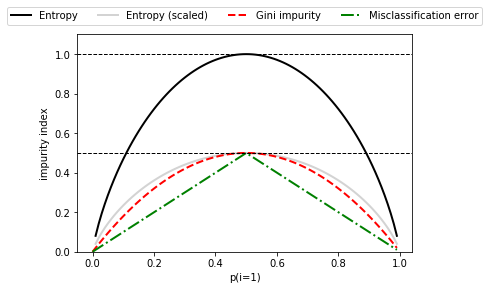

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

# Xây dựng một cây quyết định

## Ví dụ:

Cho bảng dữ liệu ban đầu:

| age | income | student | credit_rating | buys_computer |
|------|------|----|------|----|
| <=30 | high | no | fair | no |
| <=30 | high | no | excellent | no |
| 31..40 | high | no | fair | yes |
| >40 | medium | no | fair | yes |
| >40 | low | yes | fair | yes |
| >40 | low | yes | excellent | no |
| 31..40 | low | yes | excellent | yes |
| <=30 | medium | no | fair | no |
| <=30 | low | yes | fair | yes |
| >40 | medium | yes | fair | yes |
| <=30 | medium | yes | excellent | yes |
| 31..40 | medium | no | excellent | yes |
| 31..40 | high | yes | fair | yes |
| >40 | medium | no | excellent | no |


Ta bắt đầu với feature age: gồm 3 nhánh con là <=30, 31..40, >40

![alt text](https://i.imgur.com/CG0ztFG.png)

__Nhánh <=30:__

| income | student | credit_rating | buys_computer |
|--------|---------|---------------|---------------|
| high | no | fair | no |
| high | no | excellent | no |
| medium | no | fair | no |
| low | yes | fair | yes |
| medium | yes | excellent | yes |

Độ đo gini của nhánh <=30:

| income | yes | no | gini(yes,no) |
|--------|-----|----|--------------|
| high | 0 | 2 | 0 |
| medium | 1 | 1 | 0.5 |
| low | 1 | 0 | 0 |

=> $IG_{income} = \frac{2}{5}gini(0,2) + \frac{2}{5}gini(1,1) + \frac{1}{5}gini(1,0) = \frac{1}{5} = 0.2$

Tương tự như trên ta có:

$IG_{student} = \frac{2}{5}gini(2,0) + \frac{3}{5}gini(0,3) = 0.72$<br />
$IG_{credit\_rating} = \frac{3}{5}gini(1,2) + \frac{2}{5}gini(1,1) = 0.47$

Lấy max $IG_{income}, IG_{student}, IG_{credit\_rating}$ ta được $IG_{income}$ = 0.72

Từ trên ta có được nhánh của <= 30 là:<br />
![alt text](https://i.imgur.com/PZJTCaH.png)

__Nhánh 31..40:__

| income | student | credit_rating | buys_computer |
|------|----|------|----|
| high | no | fair | yes |
| low | yes | excellent | yes |
| medium | no | excellent | yes |
| high | yes | fair | yes |

Do dữ liệu của buys_computer luôn luôn là yes nên ta có nhánh của 31..40 là:

![alt text](https://i.imgur.com/jZnx8Bq.png)

__Nhánh >40:__

| income | student | credit_rating | buys_computer |
|--------|---------|---------------|---------------|
| medium | no | fair | yes |
| low | yes | fair | yes |
| low | yes | excellent | no |
| medium | yes | fair | yes |
| medium | no | excellent | no |

Tương tự như nhánh <=30 ta có:

$IG_{income} = \frac{3}{5}gini(2,1) + \frac{2}{5}gini(1,1) = 0.47$<br />
$IG_{student} = \frac{3}{5}gini(2,1) + \frac{2}{5}gini(1,1) = 0.47$<br />
$IG_{credit\_rating} = \frac{3}{5}gini(3,0) + \frac{2}{5}gini(0,2) = 0.72$<br />

Lấy max $IG_{income}, IG_{student}, IG_{credit\_rating}$ ta được $IG_{credit\_rating}$ = 0.72

Từ trên ta có được nhánh của >40 là:

![alt text](https://i.imgur.com/0avxNi2.png)

Gộp 3 nhánh <=30, 31..40, >40 lại ta được cây quyết định cuối cùng là:

![alt text](https://i.imgur.com/lFvDofc.png)

## Demo code

Ở đây chúng ta sử dụng scikit-learn. Chúng ta sẽ training 1 cây quyết định với độ sâu tối đa là 4, sử dụng độ đo gini.

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, 
                    edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,y_combined,classifier=tree_model,test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

![alt text](https://i.imgur.com/luBwEYL.png)

In [ ]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

![alt text](https://i.imgur.com/KJtyeAR.png)

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

![alt text](https://i.imgur.com/ax6gTiE.png)

# Phối hợp đa cây quyết định với random forests

## Overview

Random Forest có thể coi như một tập hợp của cây quyết định.
Ý tưởng đằng sau là lấy trung bình nhiều cây quyết định mà mỗi cây đều mang tính high variance. Nó có thể xây dựng một model tổng quát hơn, ít overfitting hơn.
Random Forest dc ví như là Black box, nó dự báo tốt nhưng rất khó giải thích cơ chế thực sự đằng sau

Chọn mẫu có thay thế và ko thay thế:
Giả sử bạn có một hộp chứa các viên bi đánh số 1 tới 5
1. Chọn mẫu có thay thế: chọn xong bi lại bỏ nó vào, chọn tiếp: 1,3,3,4,1
2. Chọn mẫu ko thay thế: chọn xong bi ko dc bỏ nó vào để tránh chọn lại nó: 1,3,2,5,4

## Các bước thực hiện

1. Rút ra 1 tập con của training set (bootstrap sample) có n điểm dữ liệu dc chọn ngẫu nhiên (chọn mẫu có thay thế )
2. Từ tập boostrap sample tạo decision tree: mỗi node ngẫu nhiên chọn d features (chọn mẫu ko thay thế ). Chia node này ra các nhánh dựa trên feature nào tối ưu hàm mục tiêu nhất (VD: có info gain cao nhất,...)
3. Lặp lại bước 1,2,... k lần
4. Kết hợp kết quả dự đoán từ các cây này, dùng majority vote cho ra kết quả cuối cùng.

## Một vài lưu ý

Lợi thế lớn của Random Forest là bạn ko phải lo nhiều về việc chọn hyperparam thật tốt. Bạn chỉ cần quan tâm tới số cây trong rừng (k), thường là càng nhiều cây càng tốt cho việc predict, nhưng đổi lại là bạn phải tính nhiều cây (chi phí tính tăng)

Một bootstrap sample xây 1 decision tree:
- Nếu quá ít điểm dữ liệu (n nhỏ) thì các tree sẽ rất khác nhau. Nó tăng tính ngẫu nhiên (randomness), giúp chống overfitting. Tuy vậy, ít quá thì thường dẫn tới chuyện model ko dc tổng quát lắm
- Điều ngược lại xảy ra cho việc n lớn.
- Đa số các trường hợp, n được cho là bằng với số records trong training set, thường thì nó cho ta một sự đánh đổi hợp lí giữa bias-variance. 
- Về lượng features d, mỗi lần phân chia, ta muốn chọn một số nhỏ hơn số lượng feature sẵn có trong training set, scikit-learn mặc định d = √m

## Demo code

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K-nearest neighbors (KNN)

KNN là 1 điển hình của **lazy learner**. Vì khi training, thuật toán này không học một điều gì từ dữ liệu training.

Thuật toán **KNN** tự nó khá đơn giản và có thể được tóm tắt bởi
các bước sau:
1. Chọn số **K** và **độ đo khoảng cách**.
2. Tìm **K điểm hàng xóm gần nhất** với điểm dữ liệu muốn phân loại.
3. Gán nhãn cho điểm dữ liệu theo **số phiếu nhiều nhất**

![title](https://i.imgur.com/2cu7C9W.png)

Dựa trên **độ đo khoảng cách** đã chọn, thuật toán KNN tìm **K** điểm trong tập huấn luyện có gần nhất (giống nhất) với điểm muốn phân loại. Nhãn của điểm dữ liệu này sẽ dựa trên số phiếu nhiều nhất của K điểm gần nhất

### Ưu điểm
- Ưu điểm chính của **cách tiếp cận từ bộ nhớ** là khi thêm dữ liệu training mới thì việc phần loại sẽ thích ứng ngay (Độ phức tạp của thuật toán khi traning bằng **0**)
- Không cần giả sử gì về phân phối của các class.

### Nhược điểm:
- KNN rất nhạy cảm với nhiễu khi K nhỏ.
- KNN là một thuật toán mà mọi tính toán đều nằm ở khâu test. Trong đó việc tính khoảng cách tới từng điểm dữ liệu trong training set sẽ tốn rất nhiều thời gian, đặc biệt là với các cơ sở dữ liệu có số chiều lớn và có nhiều điểm dữ liệu. Với **K càng lớn** thì độ phức tạp cũng sẽ **tăng lên**. Ngoài ra, việc lưu toàn bộ dữ liệu trong bộ nhớ cũng ảnh hưởng tới hiệu năng của KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### some distance metric using in KNN

| identifier | class name | args | distance function |
| --- | --- | --- | --- |
| “euclidean” | EuclideanDistance | \* | sqrt(sum((x - y)^2)) |
| “manhattan” | ManhattanDistance | \* | sum(\|x - y\|) |
| “chebyshev” | ChebyshevDistance | \* | max(\|x - y\|) |
| “minkowski” | MinkowskiDistance | p | sum(\|x - y\|^p)^(1/p) |
| “wminkowski” | WMinkowskiDistance | p, w | sum(\|w * (x - y)\|^p)^(1/p)) |
| “seuclidean” | SEuclideanDistance | V | sqrt(sum((x - y)^2 / V)) |
| “mahalanobis” | MahalanobisDistance | V or VI | sqrt((x - y)' V^-1 (x - y)) |